<a href="https://colab.research.google.com/github/ltt14/PRODIGY_ML_02/blob/main/K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 is to create a K-means clustering algorithm that groups customers of a retail store based on their purchase history.**


In [1]:
!git clone https://github.com/ltt14/PRODIGY_ML_02.git

Cloning into 'PRODIGY_ML_02'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


1. Importing important libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

2. Dataset

The dataset used was gotten from GitHub(Machine-Learning-with-Python/Datasets
/Mall_Customers.csv). It was downloaded to my device and then uploaded onto the Notebook.

In [23]:
import os
print(os.getcwd())
import pandas as pd

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Mall_Customers.csv')


/content


Saving Mall_Customers.csv to Mall_Customers (1).csv


Data Visualisation

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [27]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [29]:
df.shape

(200, 5)

Distribution of Categorical and Numerical Features :

NameError: name 'categorical_features' is not defined

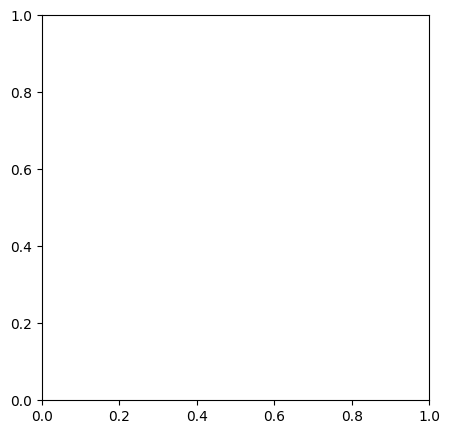

In [19]:
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))
for i in range(len(categorical_features)):
    plt.subplot(1,1,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (11,11))
for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],)
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

3. Data Transformation

In [30]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [31]:
df[["Annual Income (k$)_T","Spending Score (1-100)_T"]] = scalar.fit_transform(df[["Annual Income (k$)","Spending Score (1-100)"]])
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_T,Spending Score (1-100)_T
0,1,Male,19,15,39,-1.738999,-0.434801
1,2,Male,21,15,81,-1.738999,1.195704
2,3,Female,20,16,6,-1.700830,-1.715913
3,4,Female,23,16,77,-1.700830,1.040418
4,5,Female,31,17,40,-1.662660,-0.395980
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2.268791,1.118061
196,197,Female,45,126,28,2.497807,-0.861839
197,198,Male,32,126,74,2.497807,0.923953
198,199,Male,32,137,18,2.917671,-1.250054


4. Identifying the Optimum Number of Clusters

An elbow curve was plotted to determine the optimum value of k for the K-Means Cluster.

In [32]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate the elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()


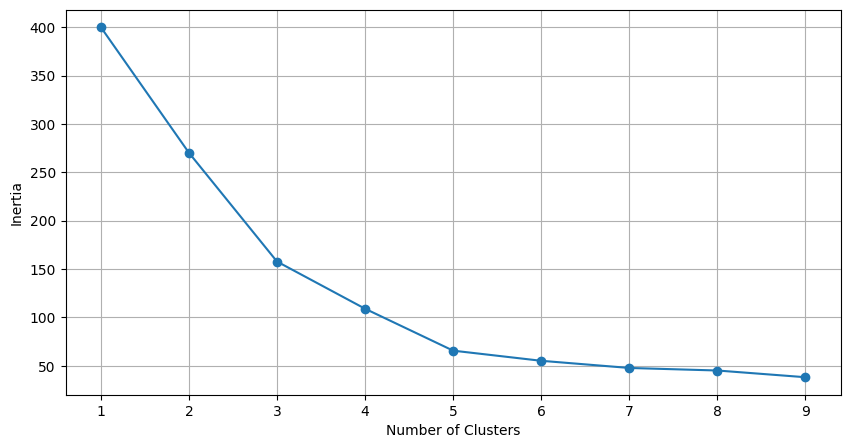

In [33]:
optimise_k_means(data=df[["Annual Income (k$)_T","Spending Score (1-100)_T"]], max_k=10)

Silhouette Score Method

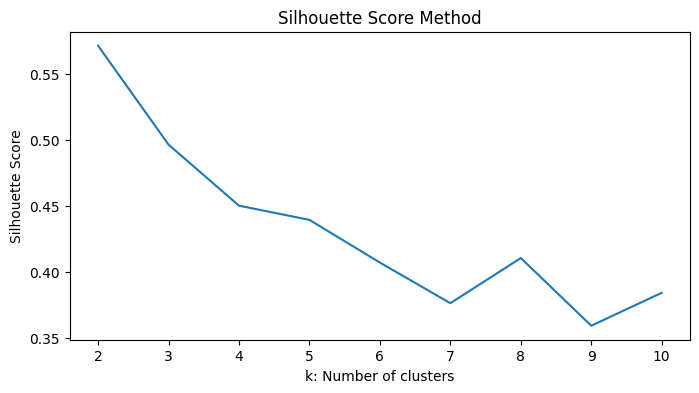

In [34]:
# Initialize variables
kmax = 10  # Maximum number of clusters to test
sil = []  # List to store silhouette scores
numerical_features = ['CustomerID', 'Age', 'Annual Income (k$)_T', 'Spending Score (1-100)_T']
m1 = np.array(df[numerical_features])  # Use only numerical features
# Compute silhouette scores
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric='euclidean'))

# Plot the silhouette scores
plt.figure(figsize=(8, 4))  # Adjust figure size if needed
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel("k: Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()


5. Applying K-Means Clustering
From the elbow curve, 5 appears to be the optimum number of clusters.

In [35]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])

KMeans(n_clusters=5)

In [ ]:
df['kmeans_3'] = kmeans.labels_
df



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),kmeans_3
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


6. Plotting the results

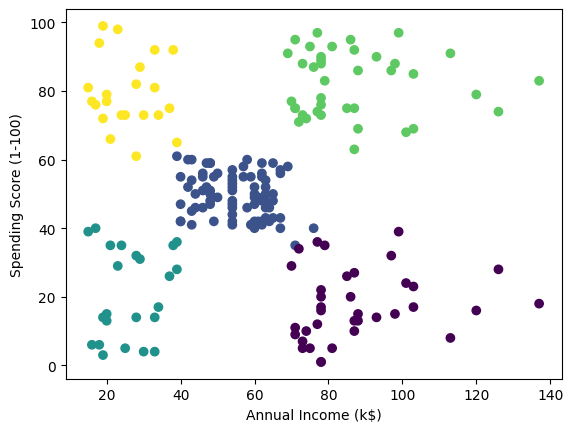

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['kmeans_3'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

7. Testing out with other numbers of clusters

In [ ]:
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    df[f'KMeans_{k}'] = kmeans.labels_


In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,Annual Income (k$)_T,Spending Score (1-100)_T,KMeans_6,KMeans_7
0,1,Male,19,15,39,2,0,1,0,3,1,-1.738999,-0.434801,0,3
1,2,Male,21,15,81,4,0,1,1,1,3,-1.738999,1.195704,5,2
2,3,Female,20,16,6,2,0,1,0,3,1,-1.700830,-1.715913,0,3
3,4,Female,23,16,77,4,0,1,1,1,3,-1.700830,1.040418,5,2
4,5,Female,31,17,40,2,0,1,0,3,1,-1.662660,-0.395980,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,0,0,2,0,2,2.268791,1.118061,1,0
196,197,Female,45,126,28,0,0,0,2,2,4,2.497807,-0.861839,2,4
197,198,Male,32,126,74,3,0,0,2,0,2,2.497807,0.923953,1,0
198,199,Male,32,137,18,0,0,0,2,2,4,2.917671,-1.250054,2,4


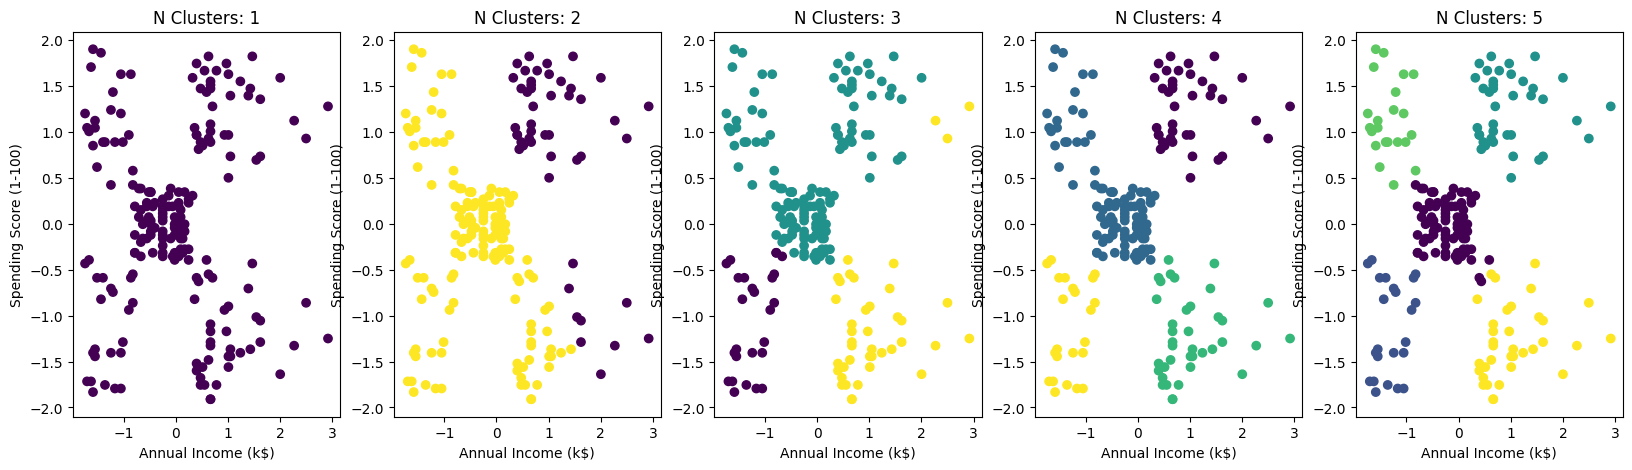

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['Annual Income (k$)_T'], y=df['Spending Score (1-100)_T'], c=df[f'KMeans_{i}'])
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')
    ax.set_title(f'N Clusters: {i}')


# 8. Conclusion

The scatter plot with k=5 illustrates the segmentation of data points into distinct clusters; each representing groups with similar income and spending behaviors. The dense regions within each cluster signify a high concentration of individuals with comparable characteristics, such as income levels and spending scores.

For example, the tightly packed yellow cluster in the center suggests a group with low variability in these traits. The more dispersed green cluster at the top left indicates greater diversity within that segment.


